L'objectif de ce NB est de vérifier la distribution des résidus du problème de moindres carrés non linéaires.

## Generate the observations

In [1]:
import numpy as np
import openturns as ot

In [2]:
ot.RandomGenerator.SetSeed(0)

In [3]:
def modelLineaire(X):
    x,theta1,theta2,theta3 = X
    y = theta1 + theta2*x + theta3*x**2
    return [y]

In [4]:
g = ot.PythonFunction(4, 1, modelLineaire) 

In [5]:
descr = ["Theta1", "Theta2", "Theta3"]

In [6]:
trueParameter = ot.Point([12.,7.,-8])
trueParameter

class=Point name=Unnamed dimension=3 values=[12,7,-8]

In [7]:
parameterDimension = trueParameter.getDimension()
parameterDimension

3

In [8]:
X = ot.Uniform()
Theta1 = ot.Dirac(trueParameter[0])
Theta2 = ot.Dirac(trueParameter[1])
Theta3 = ot.Dirac(trueParameter[2])

X.setDescription(["X"])
Theta1.setDescription(["Theta1"])
Theta2.setDescription(["Theta2"])
Theta3.setDescription(["Theta3"])

inputRandomVector = ot.ComposedDistribution([X, Theta1, Theta2, Theta3])

In [9]:
candidate = ot.Point([8.,9.,-6.])
candidate

class=Point name=Unnamed dimension=3 values=[8,9,-6]

In [10]:
calibratedIndices = [1,2,3]
model = ot.ParametricFunction(g, calibratedIndices, candidate)

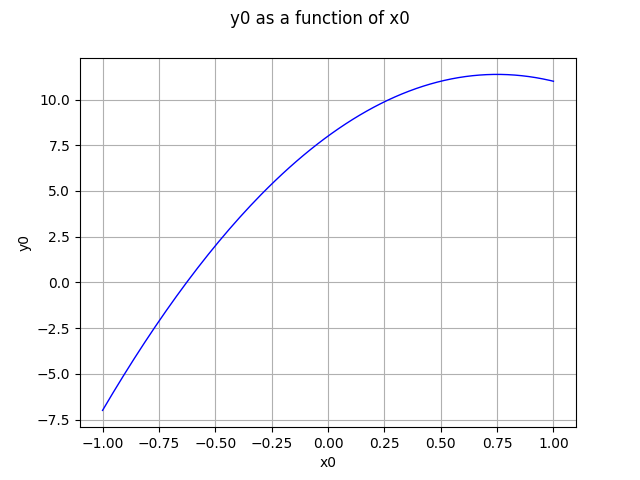

In [11]:
model.draw(-1,1)

## Calibration

In [12]:
outputObservationNoiseSigma = 2. # (Pa)
observationOutputNoise = ot.Normal(0.,outputObservationNoiseSigma)

In [13]:
size = 10

In [14]:
# 1. Generate exact outputs
inputSample = inputRandomVector.getSample(size)
outputStress = g(inputSample)
# 2. Add noise
sampleNoiseH = observationOutputNoise.getSample(size)
outputObservations = outputStress + sampleNoiseH
# 3. Calibrate
inputObservations = inputSample[:,0]
algo = ot.LinearLeastSquaresCalibration(model, inputObservations, outputObservations, candidate, "SVD")
algo.run()
calibrationResult = algo.getResult()

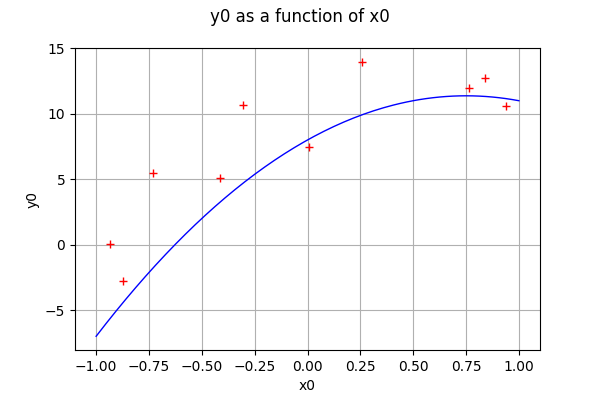

In [15]:
myGraph = model.draw(-1,1)
myCloud = ot.Cloud(inputObservations,outputObservations)
myCloud.setColor("red")
myGraph.add(myCloud)
myGraph

## Draw residual distribution

The goal is to check the distribution of the residuals.

In [16]:
residualDistribution = calibrationResult.getObservationsError()
residualDistribution

class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[2.52366] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1]

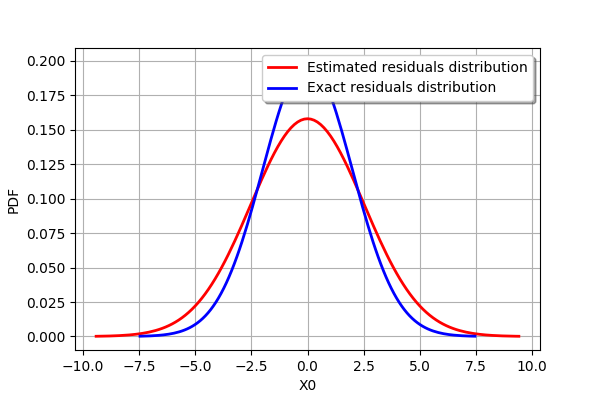

In [17]:
graph = residualDistribution.drawPDF()
graphExact = observationOutputNoise.drawPDF()
graphExact.setColors(["blue"])
graph.add(graphExact)
graph.setLegends(["Estimated residuals distribution","Exact residuals distribution"])
graph

In [18]:
model.setParameter(trueParameter)
#for i in range(size):
#    print(model.parameterGradient(inputObservations[i]).transpose())

In [19]:
model.setParameter(candidate)
#for i in range(size):
#    print(model.parameterGradient(inputObservations[i]).transpose())

## Print residuals

In [20]:
thetaPosterior = calibrationResult.getParameterMAP()

In [21]:
model.setParameter(thetaPosterior)
modelObservationsPosterior = model(inputObservations)

In [22]:
residuals = modelObservationsPosterior - outputObservations
residuals

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=10 dimension=1 description=[y0] data=[[-1.90715],[0.147659],[-2.88574],[-0.976185],[-2.50755],[0.794895],[-0.91467],[3.36979],[3.00012],[1.87883]]